In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [2]:
# E1
#  T1 2D data vectors, 10000 multivariate normal
# Generating the synthetic data.
mu1 = [1,2]
sigma1 = [[2,0],[0,0.5]]
mu2 = [-3,-5]
sigma2 = [[1,0],[0,1]]
n = 1000
x = [np.random.multivariate_normal(mu1,sigma1,n), np.random.multivariate_normal(mu2,sigma2,n)]
# Generating an array of all our data, so we don't know about clusters.
xarr = np.concatenate((x[0], x[1]),0)
# Generating pandas table.
dataxarr = pd.DataFrame(xarr, columns=['x', 'y'])

In [3]:
#  T2
# We need each 2D multivariate data separated for this purpose, so we do a data
# frame with all data separated in dimensions and distributions.
data = pd.DataFrame(x[0], columns=['mu1 x', 'mu1 y'])
data = pd.concat([data, pd.DataFrame(x[1], columns=['mu2 x', 'mu2 y'])], axis=1)

Text(0, 0.5, 'y')

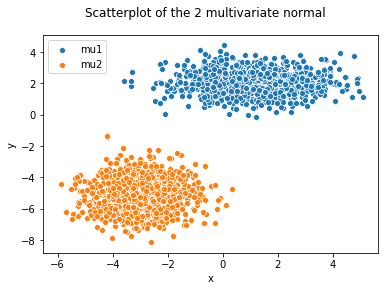

In [4]:
# Plot data distributions, we can see that data from the same distribution is correlated,
# and is not correlated with data from other distribution.
scatfig1 = plt.figure()
scatfig1.suptitle('Scatterplot of the 2 multivariate normal', fontsize=12)
sns.scatterplot(x='mu1 x', y='mu1 y', data=data, label='mu1')
sns.scatterplot(x='mu2 x', y='mu2 y', data=data, label='mu2')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

/srv/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


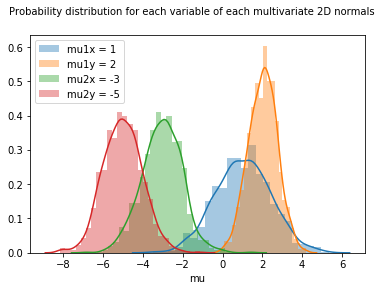

In [5]:
# Plot for each mu in 1D as a distribution probability.
probfig1 = plt.figure()
probfig1.suptitle('Probability distribution for each variable of each multivariate 2D normals', fontsize=10)
sns.distplot(data['mu1 x'], label='mu1x = 1')
sns.distplot(data['mu1 y'], label='mu1y = 2')
sns.distplot(data['mu2 x'], label='mu2x = -3')
sns.distplot(data['mu2 y'], label='mu2y = -5')
plt.xlabel('mu')
plt.legend()


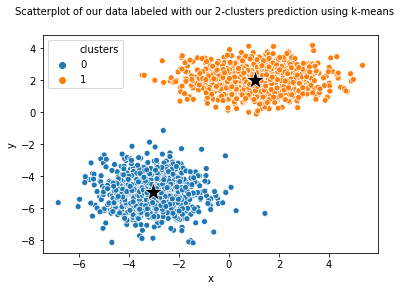

In [6]:
# E2
#  T1
# k-means clustering algorithm with k=2 with xarr from E1-T1 as our data  samples.
kmeanscluster = KMeans(n_clusters=2).fit(xarr)
datacentersk = pd.DataFrame(kmeanscluster.cluster_centers_, columns=['x', 'y'])
# Getting the predicted cluster for each data.
predictionk = pd.DataFrame(kmeanscluster.predict(xarr), columns=['clusters'])
# Grouping data and cluster info, in one data frame.
datatotk = pd.concat([dataxarr, predictionk], axis=1)
# Plotting all data, colored by clusters. with hue = 'clusters', the label we gave to prediction.
kmeansfig1 = plt.figure()
kmeansfig1.suptitle('Scatterplot of our data labeled with our 2-clusters prediction using k-means', fontsize=10)
sns.scatterplot(x='x', y='y', data=datatotk, hue='clusters')
# Plotting centers for each clusters on the above scatterplot
sns.scatterplot(x='x', y='y', data=datacentersk, marker='*', color='black', s=400)


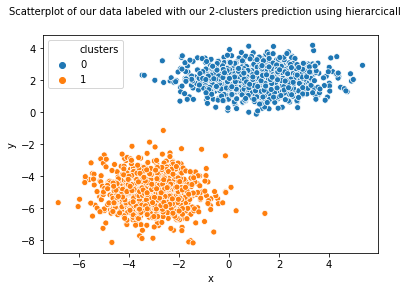

In [7]:
#  T2 Hierarchicall clustering algorithm
# Same process as E2-T1, this time for
# hierarchicall algorithm using the same xarr for all data.
hierarcicallcluster = AgglomerativeClustering(n_clusters=2).fit(xarr)
predictionhier = pd.DataFrame(hierarcicallcluster.fit_predict(xarr), columns=['clusters'])
datatothier = pd.concat([dataxarr, predictionhier], axis=1)
# Plotting.
hierfig1 = plt.figure()
hierfig1.suptitle('Scatterplot of our data labeled with our 2-clusters prediction using hierarcicall', fontsize=10)
sns.scatterplot(x='x', y='y', data=datatothier, hue='clusters')

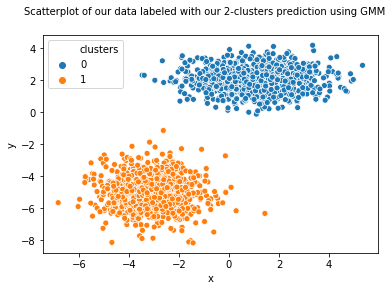

In [8]:
#  T3 Gaussian Mixture Model algorithm
# Same process as E2-T1, this time for
# GMM algorithm using the same xarr for all data.
GMM = GaussianMixture(n_components=2, covariance_type='full').fit(xarr)
predictiongmm = pd.DataFrame(GMM.predict(xarr), columns=['clusters'])
datatotgmm = pd.concat([dataxarr, predictiongmm], axis=1)
# Plotting.
gmmfig1 = plt.figure()
gmmfig1.suptitle('Scatterplot of our data labeled with our 2-clusters prediction using GMM', fontsize=10)
sns.scatterplot(x='x', y='y', data=datatotgmm, hue='clusters')

With BIC the optimal number of clusters is: 2
With AIC the optimal number of clusters is: 2


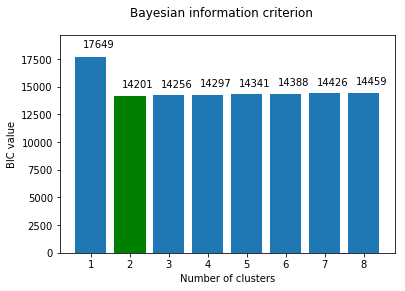

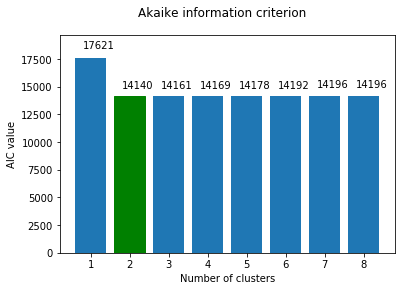

In [9]:
#  T4 BIC & AIC for optimal GMM
# Using xarr from E1-T1 as out data samples.
# Test for 8 clusters as an example.
nc = 8
bic = []
aic = []
n_components_range = range(1,nc+1)
# Getting BIC and AIC values for each number of clusters in order to find
# the best clusters number.
for i in n_components_range:
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm.fit(xarr)
    # BIC values.
    bic.append([gmm.bic(xarr), i])
    # AIC values.
    aic.append([gmm.aic(xarr), i])
# Making it a data frame.
bicvalues = pd.DataFrame(bic, columns=['bic', 'n_clusters'])
aicvalues = pd.DataFrame(aic, columns=['aic', 'n_clusters'])

# Plotting BIC bar plot.
fig1, ax1 = plt.subplots()
fig1.suptitle('Bayesian information criterion', fontsize=12)
barcollection1 = ax1.bar(np.arange(nc), bicvalues['bic'])
ax1.set_ylim(0,max(bic)[0]+2000)
plt.xticks(np.arange(nc), bicvalues['n_clusters'])
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')
# Display the values on top of each bar
for i, bar in enumerate(barcollection1):
    ax1.text(bar.get_x() + bar.get_width()/4., 1.05*bar.get_height(), int(bar.get_height()))
    if i == (min(bic)[1]-1):
        # Set color green for the minimum BIC value.
        bar.set_color('g')

# Plotting AIC values
fig2, ax2 = plt.subplots()
fig2.suptitle('Akaike information criterion', fontsize=12)
barcollection2 = ax2.bar(np.arange(nc), aicvalues['aic'])
ax2.set_ylim(0,max(bic)[0]+2000)
plt.xticks(np.arange(nc), bicvalues['n_clusters'])
plt.xlabel('Number of clusters')
plt.ylabel('AIC value')
for i, bar in enumerate(barcollection2):
    ax2.text(bar.get_x() + bar.get_width()/4., 1.05*bar.get_height(), int(bar.get_height()))
    if i == (min(aic)[1]-1):
        bar.set_color('g')
print('With BIC the optimal number of clusters is:', min(bic)[1])
print('With AIC the optimal number of clusters is:', min(aic)[1])

Text(0, 0.5, 'y')

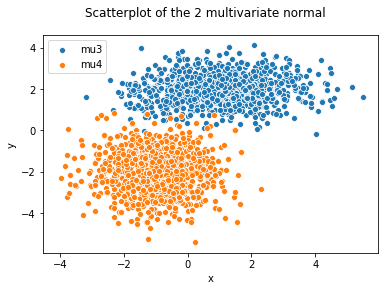

In [10]:
#  T5 Centers of clusters closer, and best cluster algorithm?
# Making 2 synthetic clusters with closer centroids.
mu3 = [1,2]
sigma3 = [[2,0],[0,0.5]]
mu4 = [-1,-2]
sigma4 = [[1,0],[0,1]]
n = 1000
x2 = [np.random.multivariate_normal(mu3, sigma3, n), np.random.multivariate_normal(mu4, sigma4, n)]
xarr2 = np.concatenate((x2[0], x2[1]),0)
dataxarr2 = pd.DataFrame(xarr2, columns=['x', 'y'])
data2 = pd.DataFrame(x2[0], columns=['mu3 x', 'mu3 y'])
data2 = pd.concat([data2, pd.DataFrame(x2[1], columns=['mu4 x', 'mu4 y'])], axis=1)
# We plot our data, labeled with our known class labels, we can see centroids are closer.
scatfig2 = plt.figure()
scatfig2.suptitle('Scatterplot of the 2 multivariate normal', fontsize=12)
sns.scatterplot(x='mu3 x', y='mu3 y', data=data2, label='mu3')
sns.scatterplot(x='mu4 x', y='mu4 y', data=data2, label='mu4')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

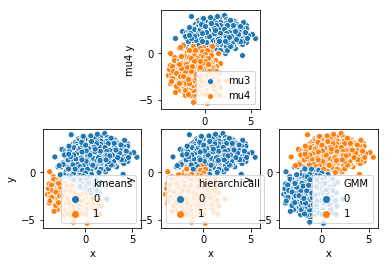

In [13]:
# Let's see how our methods predict our clusters, now that we have closer centroids.
datapredictions = pd.DataFrame(xarr2, columns=['x', 'y'])
# K-Means
kmeanscluster = KMeans(n_clusters=2).fit(xarr)
datapredictions = pd.concat([datapredictions, pd.DataFrame(kmeanscluster.predict(xarr2), 
                                                           columns=['kmeans'])], axis=1)
# Hierarchicall
hierarcicallcluster = AgglomerativeClustering(n_clusters=2).fit(xarr2)
datapredictions = pd.concat([datapredictions, pd.DataFrame(hierarcicallcluster.fit_predict(xarr2), 
                                                           columns=['hierarchicall'])], axis=1)
# GMM
GMM = GaussianMixture(n_components=2, covariance_type='full').fit(xarr2)
datapredictions = pd.concat([datapredictions, pd.DataFrame(GMM.predict(xarr2), columns=['GMM'])], axis=1)

# Plotting of real clusters vs clusters defined by each clustering algorithms
allfig = plt.figure()
plt.subplot(2,3,2)
sns.scatterplot(x='mu3 x', y='mu3 y', data=data2, label='mu3')
sns.scatterplot(x='mu4 x', y='mu4 y', data=data2, label='mu4')
plt.subplot(2,3,4)
sns.scatterplot(x='x', y='y', data=datapredictions, hue='kmeans')
plt.subplot(2,3,5)
sns.scatterplot(x='x', y='y', data=datapredictions, hue='hierarchicall')
plt.subplot(2,3,6)
sns.scatterplot(x='x', y='y', data=datapredictions, hue='GMM')

In [14]:
# E3

#  T1 Data from UCI ML Repository, only features, eliminate class labels
# Getting iris data.
datairis = pd.read_csv('iris.data', delimiter = ',', names = ['SL', 'SW', 'PL', 'PW', 'CLASS'])
# Eliminate class information
features = datairis.drop('CLASS', axis = 1)

In [15]:
#  T2 Apply GMM to the data in T1, and with BIC or AIC determine optimal number of clusters
# Using BIC and AIC to decide clusters size
nc = 9
bic = []
aic = []
n_components_range = range(1,nc+1)
for i in n_components_range:
    gmm = GaussianMixture(n_components=i, covariance_type='full')
    gmm.fit(features)
    bic.append([gmm.bic(features), i])
    aic.append([gmm.aic(features), i])
bicvalues = pd.DataFrame(bic, columns=['bic', 'n_clusters'])
aicvalues = pd.DataFrame(aic, columns=['aic', 'n_clusters'])

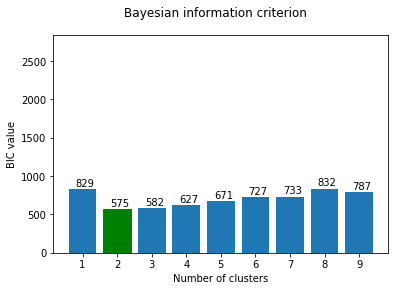

In [16]:
# Plotting BIC values
fig1, ax1 = plt.subplots()
fig1.suptitle('Bayesian information criterion', fontsize=12)
barcollection1 = ax1.bar(np.arange(nc), bicvalues['bic'])
ax1.set_ylim(min(0,min(bic)[0]),max(bic)[0]+2000)
plt.xticks(np.arange(nc), bicvalues['n_clusters'])
plt.xlabel('Number of clusters')
plt.ylabel('BIC value')
for i, bar in enumerate(barcollection1):
    ax1.text(bar.get_x() + bar.get_width()/4., 1.05*bar.get_height(), int(bar.get_height()))
    if i == (min(bic)[1]-1):
        bar.set_color('g')


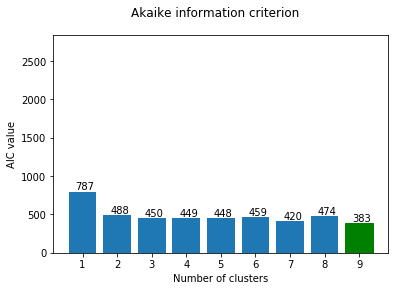

In [17]:
# Plotting AIC values.
fig2, ax2 = plt.subplots()
fig2.suptitle('Akaike information criterion', fontsize=12)
barcollection2 = ax2.bar(np.arange(nc), aicvalues['aic'])
ax2.set_ylim(min(0,min(bic)[0]),max(bic)[0]+2000)
plt.xticks(np.arange(nc), bicvalues['n_clusters'])
plt.xlabel('Number of clusters')
plt.ylabel('AIC value')
for i, bar in enumerate(barcollection2):
    ax2.text(bar.get_x() + bar.get_width()/4., 1.05*bar.get_height(), int(bar.get_height()))
    if i == (min(aic)[1]-1):
        bar.set_color('g')

In [18]:
print('With BIC the optimal number of clusters is:', min(bic)[1])
print('With AIC the optimal number of clusters is:', min(aic)[1])

With BIC the optimal number of clusters is: 2
With AIC the optimal number of clusters is: 9


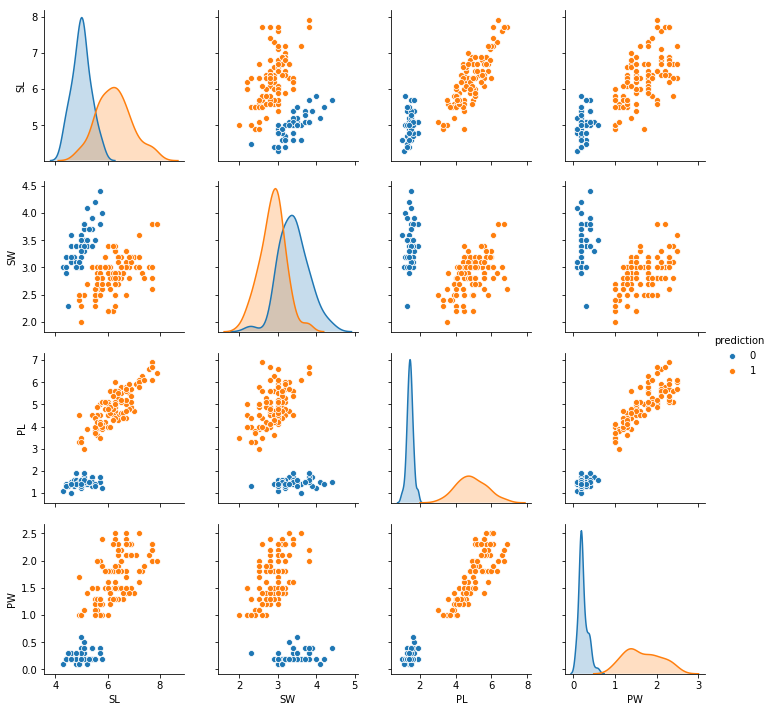

In [19]:
# BIC clusters size. Scatterplot of our data in clusters predicted with the GMM.
gmm = GaussianMixture(n_components=min(bic)[1], covariance_type='full')
gmm.fit(features)
featurespredictedbic = pd.concat([features, pd.DataFrame(gmm.predict(features), columns=['prediction'])], axis =1)
sns.pairplot(featurespredictedbic, vars=['SL', 'SW', 'PL', 'PW'], hue='prediction')


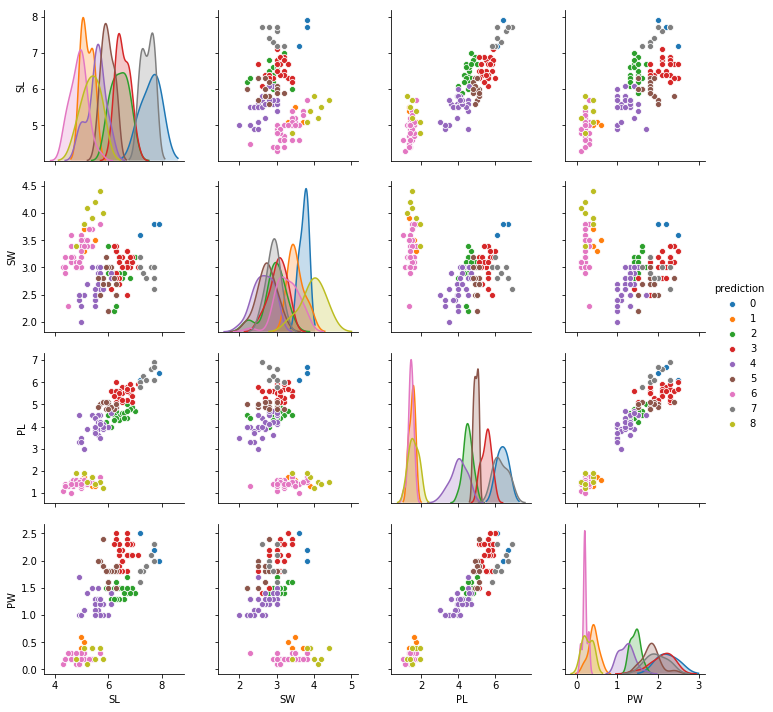

In [20]:
# AIC clusters size. Scatterplot of our data in clusters predicted with the GMM.
gmm = GaussianMixture(n_components=min(aic)[1], covariance_type='full')
gmm.fit(features)
featurespredictedaic = pd.concat([features, pd.DataFrame(gmm.predict(features), columns=['prediction'])], axis =1)
sns.pairplot(featurespredictedaic, vars=['SL', 'SW', 'PL', 'PW'], hue='prediction')